Reference Link: https://www.youtube.com/watch?v=u2TjZzNuly8&list=PLQY2H8rRoyvwWuPiWnuTDBHe7I0fMSsfO&index=5

Tensorflow all Datatsets: https://www.tensorflow.org/datasets/catalog/overview#all_datasets

Rock Paper Scissor Dataset : https://laurencemoroney.com/datasets.html

In [13]:
import os
import zipfile

In [14]:
local_zip = '/content/drive/MyDrive/Colab Notebooks/Datasets/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/Datasets/')
zip_ref.close()

In [15]:
local_zip = '/content/drive/MyDrive/Colab Notebooks/Datasets/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/Datasets/')
zip_ref.close()

We don't need to create labels for the images.

The following code creates an image data generator that generates image for the training from the directory they were downloaded.

Training generator creates training data from that.

In [16]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator


TRAINING_DIR = "/content/drive/MyDrive/Colab Notebooks/Datasets/rps"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
    

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=126
)

Found 2520 images belonging to 3 classes.


In [17]:
VALIDATION_DIR = "/content/drive/MyDrive/Colab Notebooks/Datasets/rps-test-set"
validation_datagen = ImageDataGenerator(rescale = 1./255)


validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)


Found 372 images belonging to 3 classes.


Images are colored this time

In [18]:

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution with Maxpooling
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),


    # Flatten the results to feed into a Dense layer NN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5), #Dropout throws away some neurons
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax') 
    # 3 output neuron layers for 3 classes rock, paper, scissors
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")

# We don't have labels because we're using generator. It's inferring the labels
# from the parent directories of both the training and validation datasets.

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)     

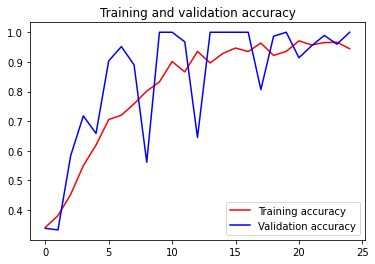

<Figure size 432x288 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

Sanity Check

Order [Paper. Rock. Scissor.]

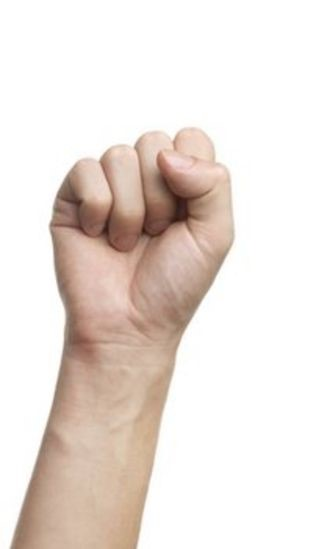

In [25]:
from IPython.display import Image
Image(filename='sanity_rock.jpg')

In [23]:
import numpy as np
from google.colab import files
from keras.preprocessing import image


uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = tf.keras.utils.load_img(path, target_size=(150, 150))
  x = tf.keras.preprocessing.image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving sanity_rock.jpg to sanity_rock (2).jpg
1/1 [==============================] - 0s 215ms/step
sanity_rock.jpg
[[0. 1. 0.]]


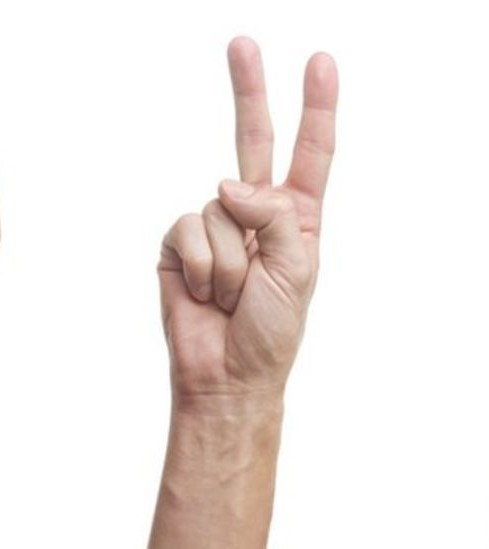

In [26]:
from IPython.display import Image
Image(filename='sanity_scissor.jpg')

In [24]:

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = tf.keras.utils.load_img(path, target_size=(150, 150))
  x = tf.keras.preprocessing.image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving sanity_scissor.jpg to sanity_scissor.jpg
1/1 [==============================] - 0s 39ms/step
sanity_scissor.jpg
[[9.999999e-01 0.000000e+00 9.833180e-08]]
